In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [43]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [44]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [45]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [46]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [47]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [48]:
def cross_val_scoring(reg, scoring):
    scores = cross_val_score(reg, X, y, cv=5, scoring=scoring)
    print('%.7f' % scores.mean())

In [49]:
cross_val_scoring(DecisionTreeClassifier(), 'accuracy')

0.4852958


In [50]:
cross_val_scoring(BaggingClassifier(n_estimators=100), 'accuracy')

0.5766105


In [51]:
cross_val_scoring(RandomForestClassifier(n_estimators=100), 'accuracy')

0.5672414


RandomForestClassifier() показал лучший результат

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [52]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=RANDOM_STATE)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [53]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [54]:
trees = [10, 50, 100] + [i for i in range(200,5001,200)]
scores = []
trees

[10,
 50,
 100,
 200,
 400,
 600,
 800,
 1000,
 1200,
 1400,
 1600,
 1800,
 2000,
 2200,
 2400,
 2600,
 2800,
 3000,
 3200,
 3400,
 3600,
 3800,
 4000,
 4200,
 4400,
 4600,
 4800,
 5000]

In [55]:
for tree in trees:
    model = RandomForestClassifier(n_estimators=tree, random_state=RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
df = pd.DataFrame({'trees' : trees, 'scores' : scores})
df

,trees,scores
0,10,0.633333
1,50,0.652083
2,100,0.654167
3,200,0.664583
4,400,0.662500
5,600,0.664583
6,800,0.664583
7,1000,0.664583
8,1200,0.660417
9,1400,0.664583


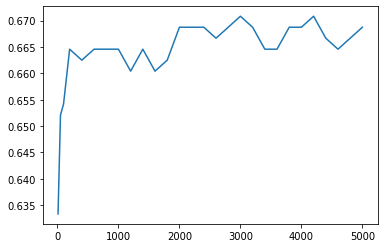

In [56]:
plt.plot(df.trees, df.scores)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [58]:
cross_val_score(GradientBoostingClassifier(), X, y, cv=5, scoring ='accuracy').mean()

0.5678565830721003

In [80]:
le = LabelEncoder()
y_1 = le.fit_transform(y)
cross_val_score(XGBClassifier(), X, y_1, cv=5, scoring ='accuracy').mean()

0.5472335423197492

GradientBoostingClassifier() с параметрами по умолчанию показывает результат немного лучше

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [58]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GBC = GradientBoostingClassifier()
parameters = {'learning_rate': np.linspace(0.01,2,10),
              'n_estimators' : range (1, 10),
              'max_depth'    : range (1, 10)
                 }
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 3, n_jobs=-1)
grid_GBC.fit(X_train, y_train)

print(grid_GBC.best_params_)

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.